In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import scipy


# Making a sinusoidal signal:


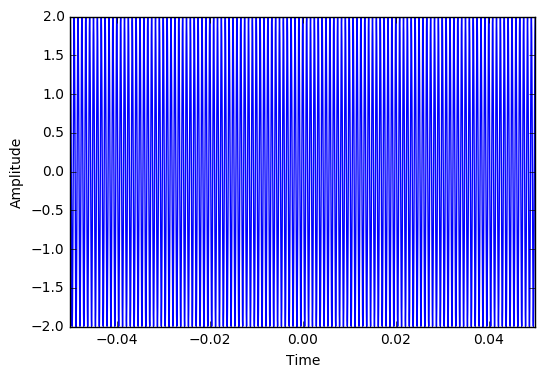

In [2]:
# cos
fs = 44000 # sampling frequency
A = 2  # Amplitude 
phi = 0  # np.pi/2
t_i = 0.05 # max time 
f0 = 1200 # fundamental frequency
t = np.arange(-t_i, t_i, 1.0 / fs)

wav = A * np.cos(2 * np.pi * f0 * t + phi) # wave

plt.plot(t, wav)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.axis([-t_i, t_i, -A, A])
plt.show()


# Snapshot of the signal above with a narrower time window 

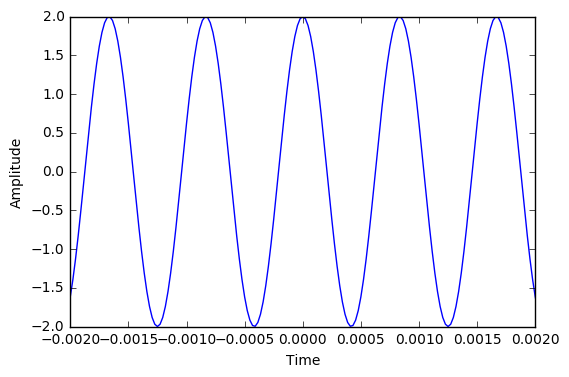

In [3]:
t_i = 0.002 # max time

wav = A * np.cos(2 * np.pi * f0 * t + phi) # wave

plt.plot(t, wav)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.axis([-t_i, t_i, -A, A])
plt.show()

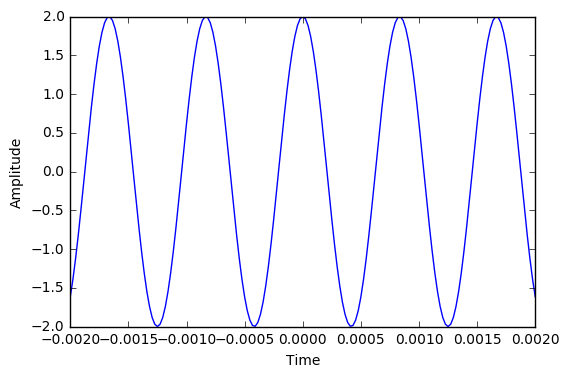

In [4]:
t = np.arange(-t_i, t_i, 1.0 / fs)

wav = A * np.cos(2 * np.pi * f0 * t + phi) # wave

plt.plot(t, wav)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.axis([-t_i, t_i, -A, A])
plt.show()

# Incoporating phase shift in signal :



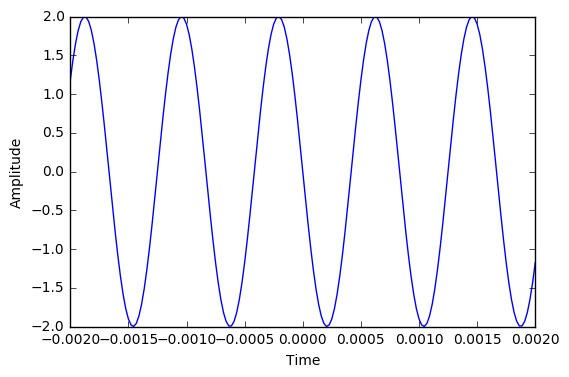

In [5]:
phi = np.pi / 2  # phase shift pi/2

wav = A * np.cos(2 * np.pi * f0 * t + phi)

plt.plot(t, wav)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.axis([-t_i, t_i, -A, A])
plt.show()


# Complex exponential signal:

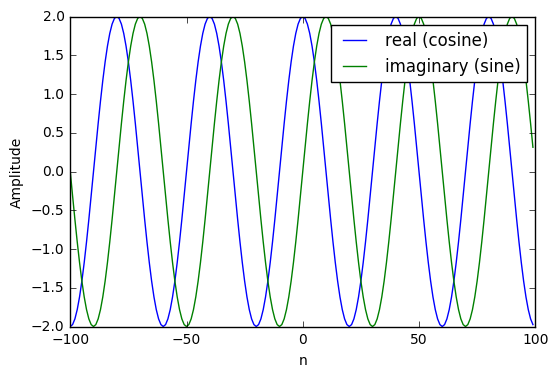

In [6]:
N = 200.0  # number of basis
k = 5  # 5 revolutions in 1T
n = np.arange(-N / 2, N / 2)
phi = 0
wav = A * np.exp(1j * 2 * np.pi * 1 / N * n * k + phi)


plt.plot(n, np.real(wav))
plt.plot(n, np.imag(wav))
plt.legend(["real (cosine)", "imaginary (sine)"])
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.axis([-N / 2, N / 2, -A, A])
plt.show()


###  Fastest switching at k = N/2 = 100

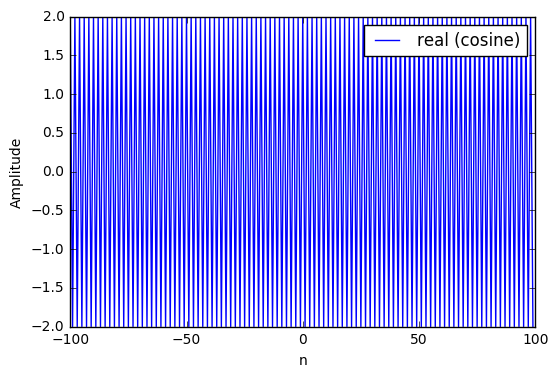

In [7]:
k = 100  # 100 revolutions in 1T

wav = A * np.exp(1j * 2 * np.pi * 1 / N * n * k + phi)


plt.plot(n, np.real(wav))
plt.legend(["real (cosine)"])
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.axis([-N / 2, N / 2, -A, A])
plt.show()


#  Fourier analysis

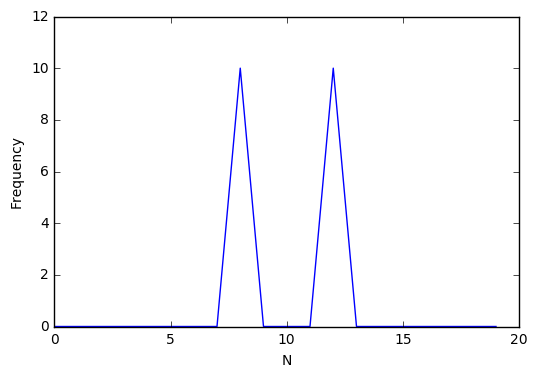

In [8]:
# analysis
N = 20
k0 = 8  # 8 revolutions in 1 T
n = np.arange(N)
A = 1
phi = 0
wav = A * np.cos(2 * np.pi * 1 / N * n * k0 + phi)
X = np.array([])
Y = np.array([])
for k in range(N):
    s = np.exp(1j * 2 * np.pi * 1 / N * n * k)
    X = np.append(X, np.sum(wav * np.conjugate(s)))

plt.plot(n, abs(X))
plt.xlabel("N")
plt.xlim(0, N)
plt.ylabel("Frequency")
plt.show()


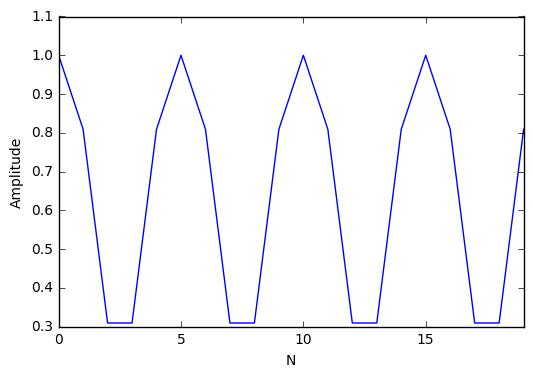

In [9]:
# synthesis
k = np.arange(N)
x = np.array([])
for n in range(N):
    s = np.exp(1j * 2 * np.pi * 1 / N * n * k)
    x = np.append(x, np.sum(X * s))

plt.plot(k, abs(x) / N)
plt.xlabel("N")
plt.ylabel("Amplitude")
plt.xlim(0, N - 1)
plt.show()


# Fourier Transform

In [10]:
def FFT(x):
    x = np.asarray(x, dtype="float16")
    N = x.shape[0]
    assert np.log2(N) % 1 == 0.0, "size of input should be a power of 2"

    N_min = min(N, 64)  # min  N point DFT

    # DFT on all sub-problems at once
    n = np.arange(N_min)
    k = n.reshape(N_min, -1)

    W = np.exp(-2j * np.pi * n * k / N_min)

    # split signals into  length * N_min pts
    x = x.reshape((N_min, -1))
    # print x[:,:x.shape[1]/2]
    X = np.dot(W, x)

    # perform DFT recursive calculation: n_min--2*n_min--3*n_min
    while X.shape[0] < N:
        X_even = X[:, :X.shape[1] / 2]  # 1st half x
        X_odd = X[:, X.shape[1] / 2:]  # 2nd half x
        M = np.exp(-1j * np.pi * np.arange(X.shape[0]) / X.shape[0])
        """"
        [0 1]   +- [f0]  [2 3]
        [4 5]      [f1]  [4 5]	

         [0 1] +  [f0*2 f0*3]     [0+f0*2 1+f0*3]   
         [4 5]	  [f1*6 f1*7]  =  [4+f1*6 5+f1*7] 
         [0 1] -  [f0*2 f0*3]     [0-f0*2 1-f0*3]   
         [4 5]	  [f1*6 f1*7]	  [4-f1*6 5-f1*7]  
        """
        M = M.reshape(X.shape[0], -1)
        print M.shape

        # stack 1st half 2nd half recurcively
        X = np.vstack([X_even + M * X_odd, X_even - M * X_odd])

    return X.flatten()

wav = np.arange(2048)

# check if computed value == numpy fft value
np.allclose(FFT(wav), np.fft.fft(wav))


(64, 1)
(128, 1)
(256, 1)
(512, 1)
(1024, 1)


True

# Spectrum analysis using STFT

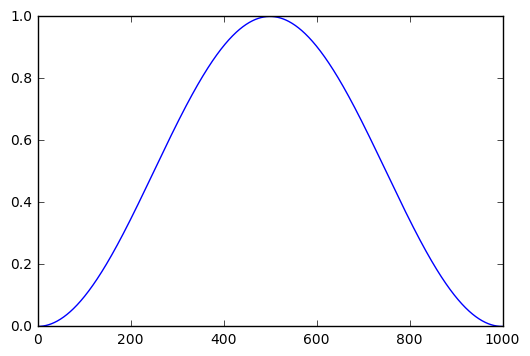

In [11]:
'''
Hanning window
'''

frame_samp = 1000  # samples
w = scipy.hanning(frame_samp)

plt.plot(np.arange(w.size), w)
plt.show()


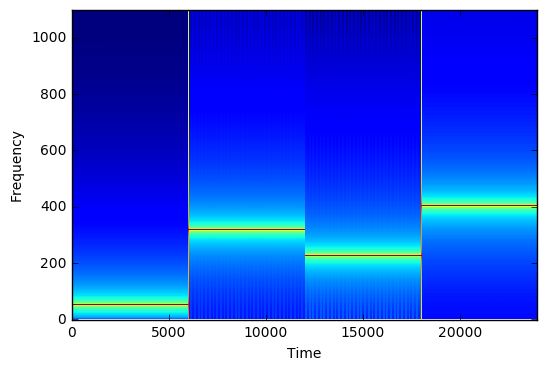

In [12]:
def stft(x, frame_size, fs, hop):
    frame_samp = int(frame_size * fs)
    hop_samp = int(hop * fs)
    w = scipy.hanning(frame_samp)
    return np.array([np.fft.rfft(w * x[i:i + frame_samp]) for i in range(0, len(x) - frame_samp, hop_samp)])


t = 15  # sec
n = np.linspace(0, t, t * fs, endpoint=False)
fs = 44000

frame_size = 0.05  # sec
hop = 0.0025  # sec

x = np.append(np.sin(n * 2 * np.pi * 1000), np.sin(n * 2 * np.pi * 6300))
x = np.append(x, np.sin(n * 2 * np.pi * 4500))
x = np.append(x, np.sin(n * 2 * np.pi * 8000))

X = stft(x, frame_size, fs, hop)


plt.imshow(20 * np.log10(np.absolute(np.transpose(X))),
           aspect="auto", interpolation="nearest", origin="lower")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()


# Filtering

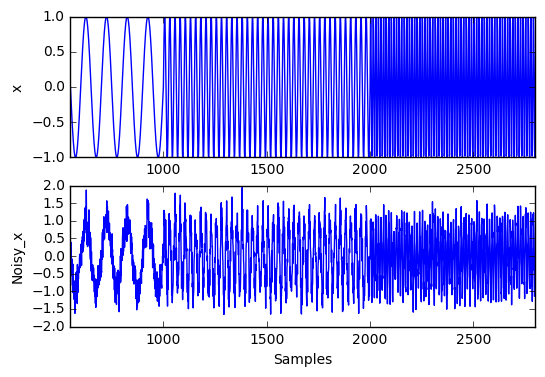

In [13]:
mean, sigma = 0, 0.3  # mean and standard deviation
noise = np.random.normal(mean, sigma, 3000)
n = np.linspace(0, 999, 1000)
x_1 = np.sin((n * 2 * np.pi * 10) / 1000)
x_2 = np.sin((n * 2 * np.pi * 40) / 1000)
x_3 = np.sin((n * 2 * np.pi * 80) / 1000)
x = np.append(x_1, x_2)
x = np.append(x, x_3)
noisy_x = x + noise
plt.subplot(2, 1, 1)
plt.plot(np.arange(x.size), x)
plt.ylabel("x")
plt.xlim([550, 2800])
plt.subplot(2, 1, 2)
plt.plot(np.arange(noisy_x.size), noisy_x)
plt.xlabel("Samples")
plt.ylabel("Noisy_x")
plt.xlim([550, 2800])
plt.show()


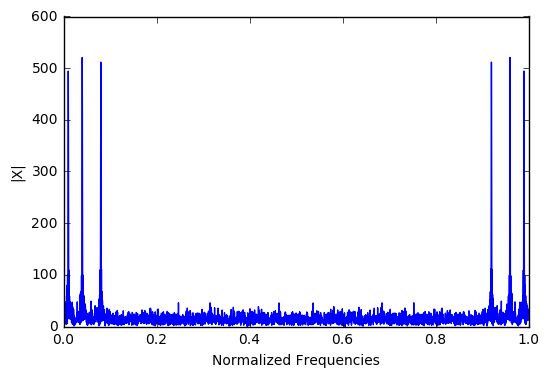

In [14]:
noisy_X = np.fft.fft(noisy_x, 3000)
normf = np.arange(3000, dtype=float) / (3000)
plt.plot(normf, abs(noisy_X))
plt.xlabel("Normalized Frequencies")
plt.ylabel("|X|")
plt.show()


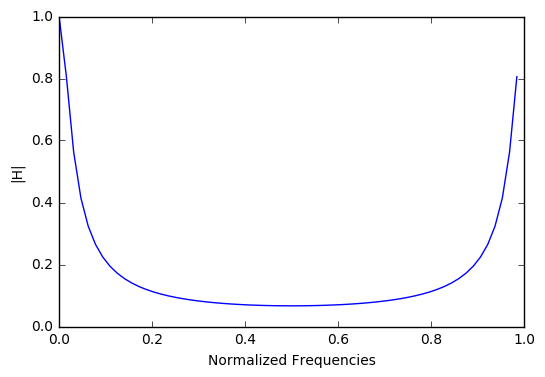

In [15]:
'''
Leaky integrator filter
'''

M = 8  # M point
lbd = float(M - 1) / float(M)
h_1 = (1 - lbd) * pow(lbd, np.arange(64))


H_1 = np.fft.fft(h_1, 64)
normf = np.arange(64, dtype=float) / (64)  # normalized frequencies

plt.plot(normf, abs(H_1))
plt.xlabel("Normalized Frequencies")
plt.ylabel("|H|")
plt.show()


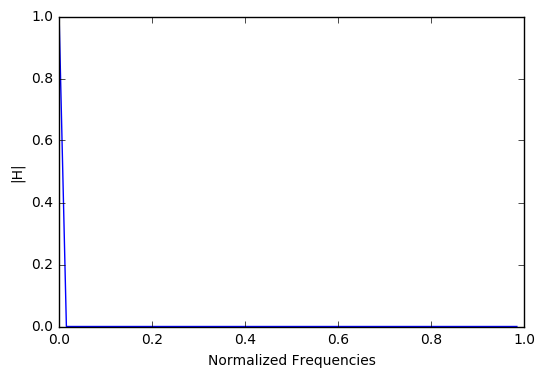

In [16]:
'''
64 pt moving point average filter
'''
h_2 = 1.0 / float(64) * np.ones(64, dtype=float)

H_2 = np.fft.fft(h_2, 64)
normf = np.arange(64, dtype=float) / (64)  # normalized frequencies

plt.plot(normf, abs(H_2))
plt.xlabel("Normalized Frequencies")
plt.ylabel("|H|")
plt.show()


### Convolution meets FFT

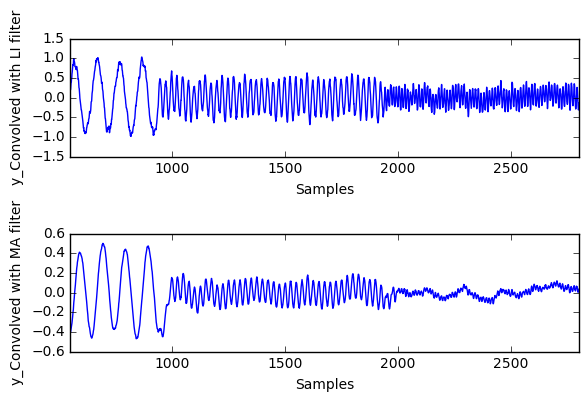

In [17]:
y_conv_1 = np.convolve(noisy_x, h_1, "valid")
y_conv_2 = np.convolve(noisy_x, h_2, "valid")

plt.subplot(2, 1, 1)
plt.plot(np.arange(y_conv_1.size), y_conv_1)
plt.xlabel("Samples")
plt.ylabel("y_Convolved with LI filter")
plt.xlim([550, 2800])
plt.subplot(2, 1, 2)
plt.plot(np.arange(y_conv_2.size), y_conv_2)
plt.xlabel("Samples")
plt.ylabel("y_Convolved with MA filter")
plt.xlim([550, 2800])
plt.tight_layout()
plt.show()


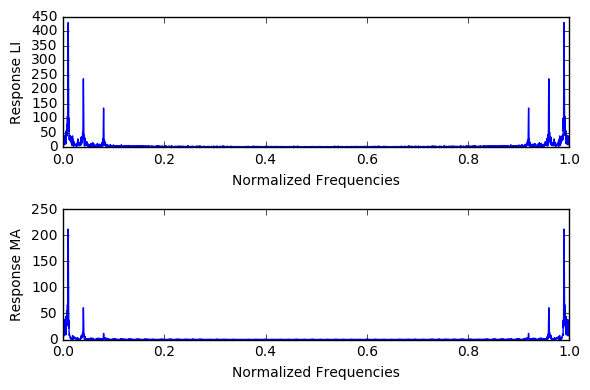

In [18]:
'''
Computing output response using FFT
'''


duration = 3000 + 64 + 1  # N+L+1

noisy_X = np.fft.fft(noisy_x, duration)
H_1 = np.fft.fft(h_1, duration)
H_2 = np.fft.fft(h_2, duration)

normf = np.arange(duration, dtype=float) / (duration)  # normalized frequencies

Y_1 = noisy_X * H_1
Y_2 = noisy_X * H_2


plt.subplot(2, 1, 1)
plt.plot(normf, abs(Y_1))
plt.xlabel("Normalized Frequencies")
plt.ylabel("Response LI")
plt.subplot(2, 1, 2)
plt.plot(normf, abs(Y_2))
plt.xlabel("Normalized Frequencies")
plt.ylabel("Response MA")
plt.tight_layout()
plt.show()


# Gibbs phenomenon

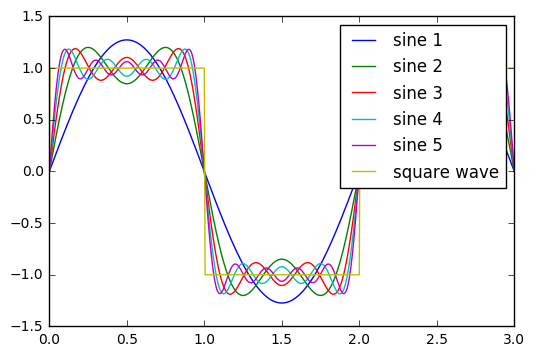

In [19]:
'''
Ripples of height 0.09*pulse height at dicontinuity.

Same effect even if n-->infinity 
'''


f0 = 3
fs = 6
n = np.linspace(0, 3, 601)

y1 = (4 / np.pi) * np.sin(2 * np.pi * f0 / fs * n)
y3 = y1 + (4 / (3 * np.pi)) * np.sin(2 * np.pi * 3 * f0 / fs * n)
y5 = y3 + (4 / (5 * np.pi)) * np.sin(2 * np.pi * 5 * f0 / fs * n)
y7 = y5 + (4 / (7 * np.pi)) * np.sin(2 * np.pi * 7 * f0 / fs * n)
y9 = y7 + (4 / (9 * np.pi)) * np.sin(2 * np.pi * 9 * f0 / fs * n)
sqwave = np.sign(np.sin(2 * np.pi * f0 / fs * n))  # square wave
plt.plot(n, y1, label="sine 1")
plt.plot(n, y3, label="sine 2")
plt.plot(n, y5, label="sine 3")
plt.plot(n, y7, label="sine 4")
plt.plot(n, y9, label="sine 5")
plt.plot(n, sqwave, label="square wave")
plt.legend(loc="upper right")
plt.show()


In [20]:
from scipy import signal

# Filter Design

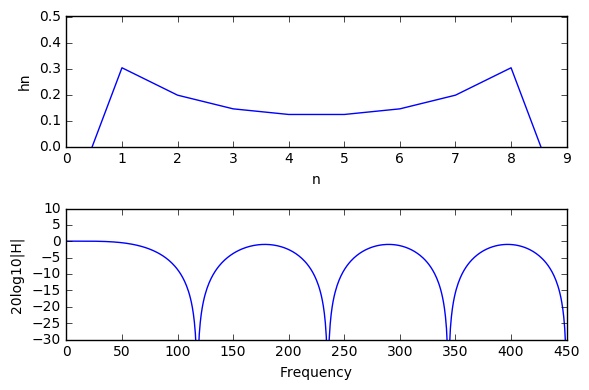

In [21]:
f0 = 900
M = 10  # M tap
fpass = 80  # pass band in Hz
fstop = 120  # stop band in Hz

hn = signal.remez(M, np.array(
    [0, fpass, fstop, f0]) / 2., [1, 0], weight=[80, 1], Hz=f0)

w, H = signal.freqz(hn, 1)

dnorm_w = w / np.pi * f0 / 2.0

plt.subplot(211)
plt.plot(np.arange(len(hn)), hn)
plt.xlabel("n")
plt.ylabel("hn")
plt.ylim(0, max(hn) + 0.2)
plt.subplot(212)
plt.plot(dnorm_w, 20 * np.log10(abs(H)))
plt.ylim(-30)
plt.xlabel("Frequency")
plt.ylabel("20log10|H|")
plt.tight_layout()
plt.show()


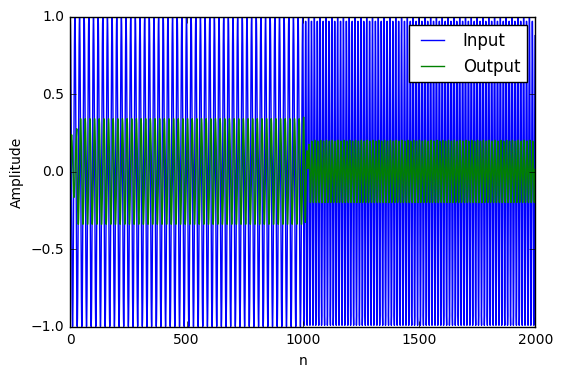

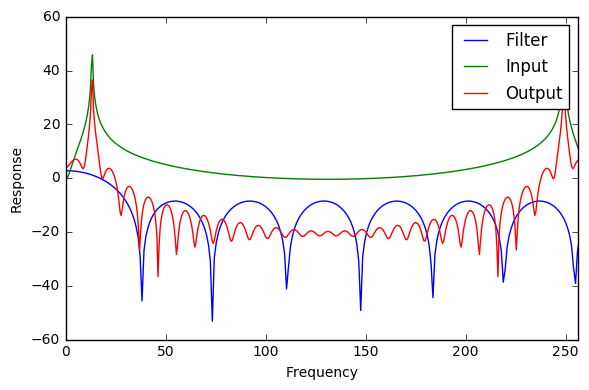

'\nOutput response filtering can be observed at passband = 50Hz and stopband = 60Hz\n\n'

In [22]:
f0 = 2000.0

fs = 1000.0

M = 30  # M tap
fpass = 50  # passband in Hz
fstop = 60  # stopband in Hz
hn = signal.remez(M, np.array([0, fpass, fstop, fs]) / 2., [1, 0], Hz=fs)
w, H = signal.freqz(hn, 1)
dnorm_w = w / np.pi * fs / 2.0


ns = 1000
n = np.arange(0, ns) / fs
x1 = np.cos(2 * np.pi * 50 * n)
x2 = np.cos(2 * np.pi * 80 * n)
x = np.append(x1, x2)

ndft = 512

X = np.fft.fft(x, ndft)

y = signal.lfilter(hn, 1, x)

Y = np.fft.fft(y, ndft)


# plt.plot(np.arange(len(hn)),hn,label="Filter")
plt.plot(np.arange(len(y)), x, label="Input")
plt.plot(np.arange(len(y)), y, label="Output")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.legend(loc="upper right")
plt.show()
plt.plot(dnorm_w, 20 * np.log10(abs(H)), label="Filter")
plt.plot(np.arange(ndft) / fs * ndft, 20 * np.log10(abs(X)), label="Input")
plt.plot(np.arange(ndft) / fs * ndft, 20 * np.log10(abs(Y)), label="Output")
plt.legend(loc="upper right")
plt.xlabel("Frequency")
plt.ylabel("Response")
plt.xlim(0, ndft / 2)
plt.tight_layout()
plt.show()

'''
Output response filtering can be observed at passband = 50Hz and stopband = 60Hz

'''